#Импорт библиотек

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib

# директория обучения
train_dir = pathlib.Path("datasets/train/")
# директория тестирования
test_dir = pathlib.Path("datasets/test/")
# директория валидации
val_dir = pathlib.Path("datasets/validation/")

#Подготовка данных для модели

In [18]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


In [19]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Построение модели

In [20]:
cnn = tf.keras.models.Sequential()

##Добавление слоев для обучения модели

In [21]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Обучение

In [22]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        36928     
                                                      

In [23]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32


98/98 [==============================] - 83s 776ms/step - loss: 5.6998 - accuracy: 0.0340 - val_loss: 3.5104 - val_accuracy: 0.0627
Epoch 2/32
98/98 [==============================] - 74s 711ms/step - loss: 3.4967 - accuracy: 0.0539 - val_loss: 3.3891 - val_accuracy: 0.0883
Epoch 3/32
98/98 [==============================] - 74s 709ms/step - loss: 3.3136 - accuracy: 0.0844 - val_loss: 2.9495 - val_accuracy: 0.2707
Epoch 4/32
98/98 [==============================] - 74s 705ms/step - loss: 3.0821 - accuracy: 0.1371 - val_loss: 2.4489 - val_accuracy: 0.4558
Epoch 5/32
98/98 [==============================] - 74s 713ms/step - loss: 2.7607 - accuracy: 0.2196 - val_loss: 1.9673 - val_accuracy: 0.5755
Epoch 6/32
98/98 [==============================] - 84s 800ms/step - loss: 2.5066 - accuracy: 0.2876 - val_loss: 1.7224 - val_accuracy: 0.5812
Epoch 7/32
98/98 [==============================] - 86s 822ms/step - loss: 2.2096 - accuracy: 0.3615 - val_loss: 1.1837 - val_accuracy: 0.7721
Epoch 8/32

In [24]:
#Точность тренировочных данных
train_loss, train_acc = cnn.evaluate(training_set)
print('Точность на тренировочных данных:', train_acc)

98/98 [==============================] - 46s 423ms/step - loss: 0.0329 - accuracy: 0.9917
Точность на тренировочных данных: 0.9916532635688782


In [25]:
#Точность данных валидации
val_loss, val_acc = cnn.evaluate(validation_set)
print('Точность на данных валидации:', val_acc)

11/11 [==============================] - 7s 188ms/step - loss: 0.3687 - accuracy: 0.9544
Точность на данных валидации: 0.9544159770011902


##Сохранение модели

In [26]:
cnn.save('trained_model.h5')

d:\repos\vegetables_recognizer\venv\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Визуализации точности

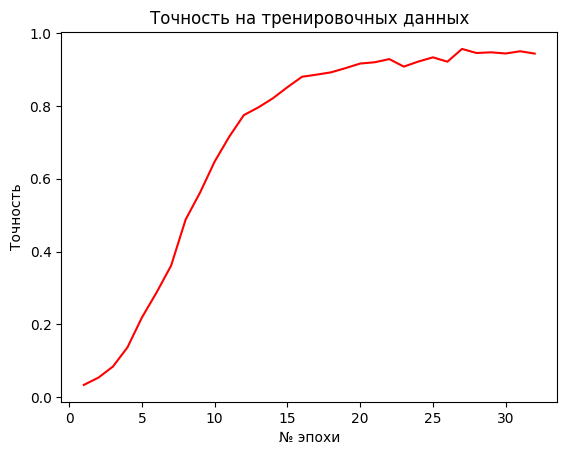

In [27]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('№ эпохи')
plt.ylabel('Точность')
plt.title('Точность на тренировочных данных')
plt.show()

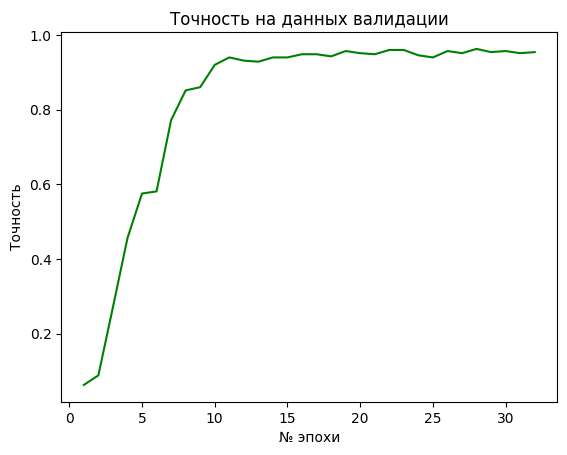

In [28]:
plt.plot(epochs,training_history.history['val_accuracy'],color='green')
plt.xlabel('№ эпохи')
plt.ylabel('Точность')
plt.title('Точность на данных валидации')
plt.show()

#Точность на тестовых данных

In [29]:
test_set = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [31]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Точность тестовых данных:', test_acc)

12/12 [==============================] - 8s 143ms/step - loss: 0.3605 - accuracy: 0.9554
Точность тестовых данных: 0.9554317593574524
